## Iris -KNN Classifier

Objective: Develop a decision tree model that can predict the species of iris flowers based on their sepal and petal measurements.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.shape

(150, 5)

In [5]:
df.isna().sum() #no missing values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [7]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(inplace=True,keep=False)

In [11]:
df.duplicated().sum()

0

In [12]:
X=df.iloc[:,1:4]
y=df.iloc[:,4:]

In [13]:
X

,sepal_width,petal_length,petal_width
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
...,...,...,...
145,3.0,5.2,2.3
146,2.5,5.0,1.9
147,3.0,5.2,2.0
148,3.4,5.4,2.3


In [14]:
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [15]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
Y=lc.fit_transform(y)

C:\Users\reshm\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
pd.DataFrame(Y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
144,2
145,2
146,2
147,2


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)

### Using KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
pred = knn.predict(X_test)

In [43]:
pred1=knn.predict(X_train)

#### Predictions and Evaluations

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [22]:
print(confusion_matrix(y_test,pred))

[[13  0  0]
 [ 0 13  2]
 [ 0  1 16]]


In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.87      0.90        15
           2       0.89      0.94      0.91        17

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



#### Choosing a K Value

In [24]:
accuracy_rate = []
df_feat = df.drop('species', axis=1)

# May take some time
for i in range(1,40):
    df
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['species'],cv=10)
    accuracy_rate.append(score.mean())

In [25]:
accuracy_rate

[0.96,
 0.9533333333333334,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9600000000000002,
 0.9666666666666668,
 0.9733333333333334,
 0.9733333333333334,
 0.9666666666666668,
 0.9666666666666666,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9666666666666668,
 0.9666666666666666,
 0.96,
 0.96,
 0.9533333333333334,
 0.96,
 0.9466666666666667,
 0.9533333333333334,
 0.9466666666666667,
 0.9533333333333334,
 0.9466666666666667,
 0.9400000000000001,
 0.9400000000000001,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9533333333333334]

Text(0, 0.5, 'Accuracy Rate')

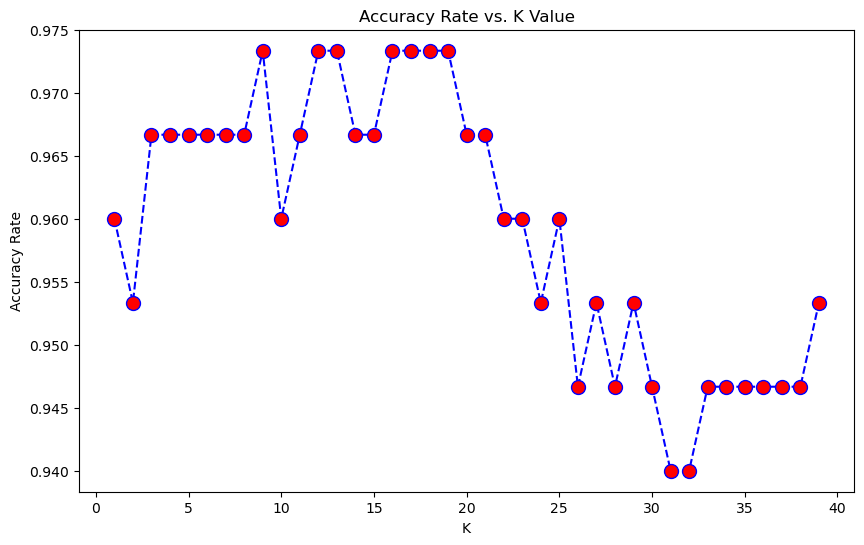

In [26]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [27]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[13  0  0]
 [ 0 13  2]
 [ 0  1 16]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.87      0.90        15
           2       0.89      0.94      0.91        17

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [33]:
# NOW WITH K=9
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=9')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=9


[[13  0  0]
 [ 0 14  1]
 [ 0  2 15]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      0.93      0.90        15
           2       0.94      0.88      0.91        17

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [34]:
#Actual value and the predicted value
a = pd.DataFrame({'Actual value': y_test, 'Predicted value': pred})
a.head()

,Actual value,Predicted value
0,1,1
1,1,1
2,2,2
3,0,0
4,2,2


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      0.93      0.90        15
           2       0.94      0.88      0.91        17

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



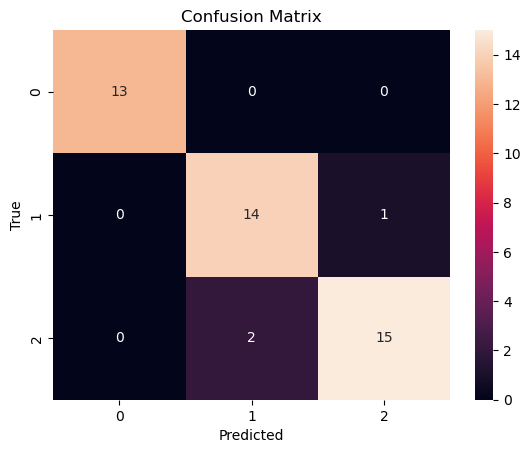

In [35]:
#Confusion matrix and classification report
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.94      0.97      0.96        35
           2       0.97      0.94      0.95        32

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



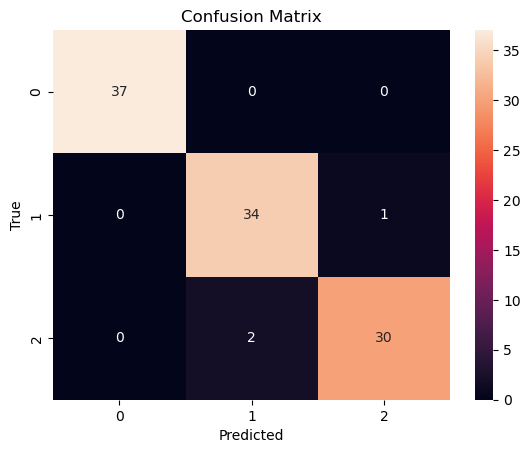

In [44]:
#Confusion matrix and classification report
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_train, pred1)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_train, pred1))